# Statistics you Should Show to Your Anti-Vaccine Friend
## By: Victorio H. S. Maculan

Got to do deal with an Anti-Vacciner and want to prove he's wrong? Here's your solution: A bunch of statistics of several epidemics/pandemics and their relation with vaccines. No more talking, let's get started.

Firstly, we need to get everything ready.

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [12]:
covid = pd.read_csv('../Databases/covid19-cases-and-deaths.csv', 
                    index_col='Date_reported', parse_dates=True)
covid_vacs = pd.read_csv('../databases/covid19-vaccination-data.csv', index_col='COUNTRY')

I think it's fair to start with the most recent pandemic: [COVID-19's 2019 Pandemic](https://en.wikipedia.org/wiki/COVID-19_pandemic).

Let's start by analysing the cases and deaths in Europe (Because the vaccination started in here).

In [13]:
global_cases = covid.groupby(['WHO_region', 'Date_reported'])['New_cases'].sum()
global_deaths = covid.groupby(['WHO_region', 'Date_reported'])['New_deaths'].sum()

europe_cases = global_cases.loc['EURO']
europe_deaths = global_deaths.loc['EURO']

europe_cases.name = 'EURO Cases'
europe_deaths.name = 'EURO Deaths'

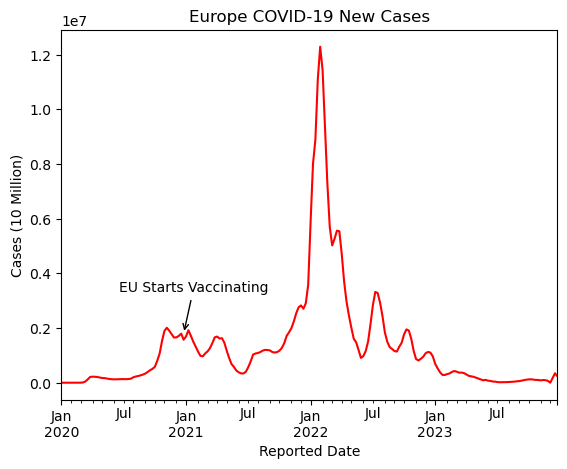

In [14]:
graph = europe_cases.plot(title='Europe COVID-19 New Cases', 
                  xlabel='Reported Date', ylabel='Cases (10 Million)',
                 color='red');
graph.annotate('EU Starts Vaccinating', 
               xy=('12-21-2020', europe_cases.loc['2020-12-20']), # Nearest register possible to 12-21-2020 (For y axis)
               xytext=('06-21-2020', europe_cases.loc['2020-12-06']*2), # Text position 
               arrowprops=dict(color='black', arrowstyle='->'));

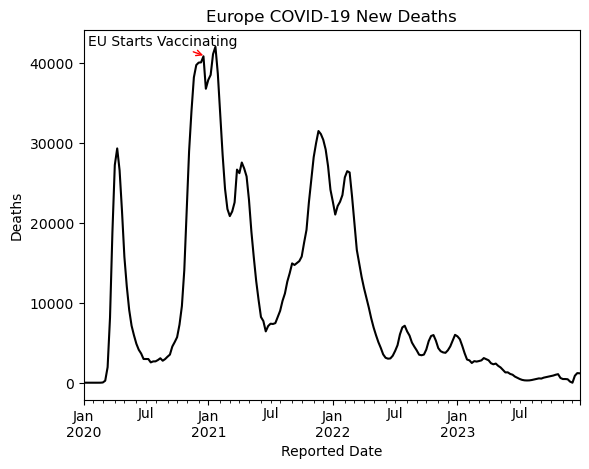

In [15]:
graph2 = europe_deaths.plot(title='Europe COVID-19 New Deaths', 
                  xlabel='Reported Date', ylabel='Deaths',
                 color='black')
graph2.annotate('EU Starts Vaccinating', 
               xy=('12-21-2020', europe_deaths.loc['2020-12-20']), # Nearest register possible to 12-21-2020 (For y axis)
               xytext=('01-15-2020', 42300), # Text position 
               arrowprops=dict(color='red', arrowstyle='->'));

The first country in the world to start vaccinating their citizens was The United Kingdom on 12-08-2020[\*](https://en.wikipedia.org/wiki/COVID-19_vaccination_in_the_United_Kingdom).

Several days laters, on 12-21-2020 many other countries from the European Union (EU) also started vaccinating. That's the day that is indicated as "EU Starts Vaccinating" on both graphs above.

In the first graph (That features the "Europe COVID-19 New Cases") we can see that there are not any significant change in the number of cases after the start of the vaccination, in fact, **the vaccine doesn't protect from from getting infected, but lower the chances of death**.

In the second graph (Featuring "Europe COVID-19 New Deaths") we notice an imediate fall in the number of deaths, that, besides two small peaks, keep going down until July of 2021. It gets even more impressing when we cosider that the period of peak of new cases (July 2021 to July 2022) was

In [32]:
peak1 = pd.merge(europe_cases['2020-07':'2021-07'], europe_deaths['2020-07':'2021-07'],
                right_index=True, left_index=True)
peak2 = pd.merge(europe_cases['2021-07':'2022-07'], europe_deaths['2021-07':'2022-07'],
                right_index=True, left_index=True)

peaks_table = pd.DataFrame([peak1.sum(), peak2.sum()], index=['peak1', 'peak2'])
peaks_table

,EURO Cases,EURO Deaths
peak1,56418271,1044425
peak2,185856783,865908
